In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("bank-marketing.csv")

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


### T1. Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
df["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

### T2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?


In [8]:
df.where(df["pdays"]!=-1)["pdays"].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### T3. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [9]:
primary_m = df.where(df["education"]=="primary")["balance"].median()
secondary_m = df.where(df["education"]=="secondary")["balance"].median()
tertiary_m = df.where(df["education"]=="tertiary")["balance"].median()
unknown_m = df.where(df["education"]=="unknown")["balance"].median()

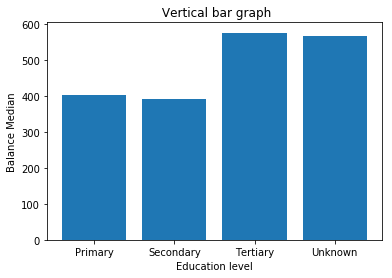

In [10]:
x=["Primary","Secondary","Tertiary","Unknown"]
y=[primary_m,secondary_m,tertiary_m,unknown_m]
plt.bar(x,y)

plt.xlabel("Education level") 
plt.ylabel("Balance Median")   
plt.title(" Vertical bar graph")
plt.show()

The Tertiary group has the heighest median.

# Exploratory Data Analysis 

In [11]:
df.isna().sum().sum()

0

In [12]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [13]:
df.response.value_counts()

no     39922
yes     5289
Name: response, dtype: int64

#### checking binary data columns

In [14]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [15]:
binary_cols

['targeted', 'default', 'housing', 'loan', 'response']

In [16]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


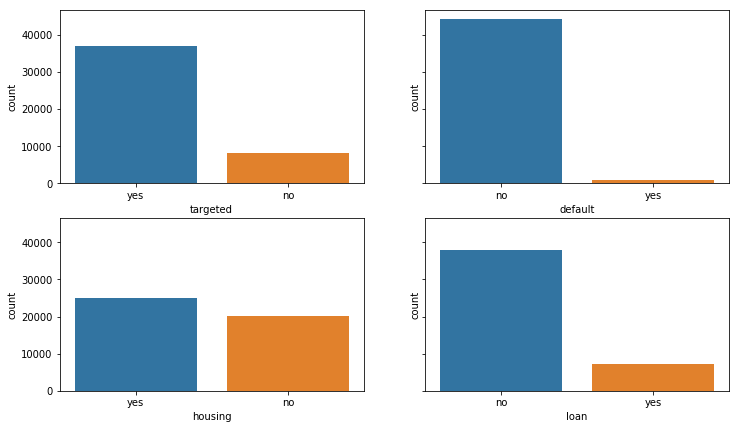

In [17]:
#class distribution of binary features.

fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot("targeted", data=df, ax=axes[0,0])
sns.countplot("default", data=df, ax=axes[0,1])
sns.countplot("housing", data=df, ax=axes[1,0])
sns.countplot("loan", data=df, ax=axes[1,1])

In [18]:
num = {'yes':1, 'no':0}
df.response.replace(num, inplace=True)
df["response"]=pd.to_numeric(df["response"], downcast="integer")

In [19]:
df[['targeted','response']].groupby(['targeted']).mean()

,response
targeted,
no,0.164409
yes,0.106603


In [20]:
df[['default','response']].groupby(['default']).mean()

,response
default,
no,0.117961
yes,0.063804


In [21]:
df[['housing','response']].groupby(['housing']).mean()

,response
housing,
no,0.167024
yes,0.077000


In [22]:
df[['loan','response']].groupby(['loan']).mean()

,response
loan,
no,0.126557
yes,0.066814


All the binary data features has significant effect on respons so I will include all of them in the model.

#### Checking non-binary data columns

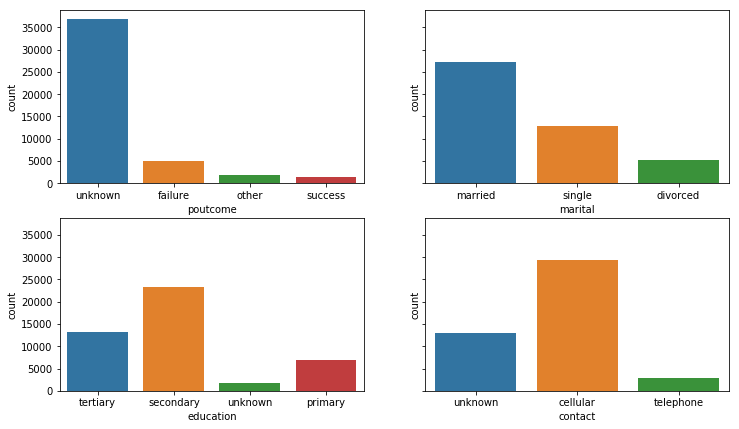

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot("poutcome", data=df, ax=axes[0,0])
sns.countplot("marital", data=df, ax=axes[0,1])
sns.countplot("education", data=df, ax=axes[1,0])
sns.countplot("contact", data=df, ax=axes[1,1])

In [25]:
df[['poutcome','response']].groupby(['poutcome']).mean()

,response
poutcome,
failure,0.126097
other,0.166848
success,0.647253
unknown,0.091615


In [26]:
df[['marital','response']].groupby(['marital']).mean()

,response
marital,
divorced,0.119455
married,0.101235
single,0.149492


In [29]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [27]:
df[['education','response']].groupby(['education']).mean()

,response
education,
primary,0.086265
secondary,0.105594
tertiary,0.150064
unknown,0.135703


In [28]:
df[['contact','response']].groupby(['contact']).mean()

,response
contact,
cellular,0.149189
telephone,0.134205
unknown,0.040707


All the non binary categorical values except  seems to be related to response so I ll use them all in th model.

#### Checking continous varibles

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


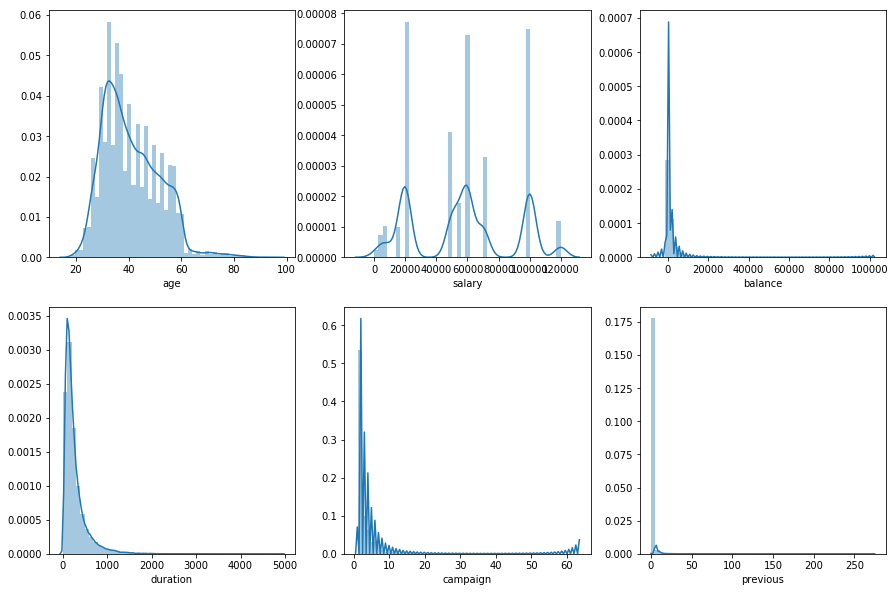

In [31]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.distplot(df["age"], ax=axes[0,0])
sns.distplot(df["salary"], ax=axes[0,1])
sns.distplot(df["balance"], ax=axes[0,2])
sns.distplot(df["duration"], ax=axes[1,0])
sns.distplot(df["campaign"], ax=axes[1,1])
sns.distplot(df["previous"], ax=axes[1,2])


In [32]:
df[['age','salary',"duration",'response']].groupby('response').mean()

,age,salary,duration
response,,,
0,40.838986,56772.456290,221.182806
1,41.670070,58770.277935,537.294574


In [33]:
df[['balance','campaign',"previous",'response']].groupby('response').mean()

,balance,campaign,previous
response,,,
0,1303.714969,2.846350,0.502154
1,1804.267915,2.141047,1.170354


From the continous varibles I ll only use duration , balance , campaign and previous

#### Dropping irrelevent features of the dataframe

In [37]:
df.drop(['age','job', 'salary', 'day', 'month',  'pdays'], axis=1, inplace=True)

# Data Preprocessing 

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [38]:
df.head()

,marital,education,targeted,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,response
0,married,tertiary,yes,no,2143,yes,no,unknown,261,1,0,unknown,0
1,single,secondary,yes,no,29,yes,no,unknown,151,1,0,unknown,0
2,married,secondary,yes,no,2,yes,yes,unknown,76,1,0,unknown,0
3,married,unknown,no,no,1506,yes,no,unknown,92,1,0,unknown,0
4,single,unknown,no,no,1,no,no,unknown,198,1,0,unknown,0


In [39]:
cat_feat=['marital','education','targeted','default','housing','loan','contact','poutcome']
X = pd.get_dummies(df, columns=cat_feat, drop_first=True)

In [41]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['balance']])
b = sc.fit_transform(df[['duration']])
c = sc.fit_transform(df[['campaign']])
d = sc.fit_transform(df[['previous']])

In [42]:
X["balance"]=a
X["duration"]=b
X["campaign"]=c
X["previous"]=d

In [43]:
X.shape

(45211, 19)

In [44]:
X.head()

,balance,duration,campaign,previous,response,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.092259,0.053070,0.0,0.0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
1,0.073067,0.030704,0.0,0.0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1
2,0.072822,0.015453,0.0,0.0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1
3,0.086476,0.018707,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0.072812,0.040260,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


### Resampling

Text(0.5,1,'Class Distribution Before Resampling')

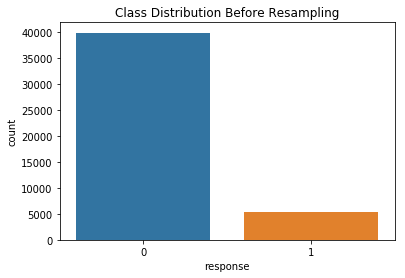

In [45]:
sns.countplot('response', data=df).set_title('Class Distribution Before Resampling')

In [47]:
X_no = X[X.response == 0]
X_yes = X[X.response == 1]

In [48]:
print(len(X_no),len(X_yes))

39922 5289


In [49]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

39922


In [51]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5,1,'Class Distribution After Resampling')

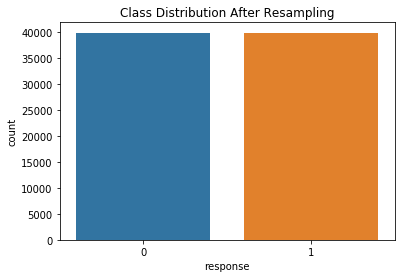

In [53]:
sns.countplot('response', data=X_upsampled).set_title('Class Distribution After Resampling')

### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = X_upsampled.drop(['response'], axis=1) #features (independent variables)
y = X_upsampled['response'] #target (dependent variable)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=52)

# Logistic Regression 

In [88]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

#### Evaluation

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [90]:
results = confusion_matrix(y_test, predictions) 

results
 

array([[10076,  1970],
       [ 2518,  9390]], dtype=int64)

In [91]:
accuracy_score(y_test, predictions) 


0.8126408950488436

In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82     12046
          1       0.83      0.79      0.81     11908

avg / total       0.81      0.81      0.81     23954



So after the evaluation of the model we get Precision = 81 % ,
    Recall    = 81 % ,
    Accuracy  = 81 % ,

The most important features of the model are loan , housing , default , duration , previous .

# Random Forest 

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
clf_forest = RandomForestClassifier(n_estimators=50, max_depth=30)

In [106]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### predicting the training data and evaluating

In [107]:
pred = clf_forest.predict(X_train)

In [108]:
accuracy_score(y_train, pred)

0.9999105385578816

In [109]:
confusion_matrix(y_train, pred)

array([[27872,     4],
       [    1, 28013]], dtype=int64)

In [115]:
print(classification_report(y_train,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     27876
          1       1.00      1.00      1.00     28014

avg / total       1.00      1.00      1.00     55890



### predicting the testing data and evaluating

In [110]:
pred_test = clf_forest.predict(X_test)

In [111]:
accuracy_score(y_test, pred_test)

0.9540369040661267

In [113]:
confusion_matrix(y_test, pred_test)

array([[10968,  1078],
       [   23, 11885]], dtype=int64)

In [116]:
print(classification_report(y_test,pred_test))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95     12046
          1       0.92      1.00      0.96     11908

avg / total       0.96      0.95      0.95     23954



#### Therefore the average results of predictions of training and testing data are :-

 avg. accuracy = 97.7 %

 avg. precision = 98 %

 avg. recall = 97.5 %

The most important features of the model are loan , housing , default , duration , previous .

# Conclusion

#### The random forest model is better than Logistic regression model because we get 95 % accuracy for test set in random forest whereas we got only 81 % accuracy for the test set using the logistic regression model.